In [3]:
# used to supress display of warnings
import warnings
warnings.filterwarnings("ignore")
# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score,precision_score, confusion_matrix, accuracy_score,make_scorer, classification_report, plot_confusion_matrix,f1_score,matthews_corrcoef
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import Pipeline
# KNN imputation
from sklearn.impute import KNNImputer
# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve
# normalizer
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# variance threshold
from sklearn.feature_selection import VarianceThreshold
# RFECV
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV
# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict,cross_validate
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.over_sampling import SMOTE

_________________________________________________________________

# AIML Module Project - FMT - Project 1

# DOMAIN :- Semiconductor Manufacturing Process

_________________________________________________________________


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e8;">  Import and warehouse data  

## Task: Import all the given datasets and explore shape and size of each.

In [566]:
#Importing Part 1 csv file
df1 = pd.read_csv('signal-data.csv')
df1.head(20)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


In [4]:
print("Size:",df1.shape)

Size: (1567, 592)


In [547]:
#Importing Part 2 excel file
df2 = pd.read_excel('Future_predictions.xlsx')
df2.head()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [517]:
print("Size:",df2.shape)

Size: (18, 590)


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e8;">  Data Cleaning
    
## Task: Missing/incorrect value treatment

In [6]:
print ('The dataset has {} observations/rows and {} variables/columns.'\
       .format(df1.shape[0], df1.shape[1]))

The dataset has 1567 observations/rows and 592 variables/columns.


In [7]:
df1.rename(columns = {'Pass/Fail':'Class'},inplace=True)

In [8]:
df1['Class']=df1['Class'].replace(to_replace=[-1, 1], value=[1, 0])

In [9]:
df1['Class'].value_counts()

1    1463
0     104
Name: Class, dtype: int64

Pass: 1463
Fail : 104
> Data is imbalanced and its Pass/Fail ratio is shown as 14:1

In [10]:
# what if all the columns/rows with missing values were removed
nmv = df1.dropna(axis=1)
print('No. of columns after removing columns with missing data: {}'\
.format(nmv.shape[1]))

nmv = df1.dropna(axis=0)
print('No. of rows after removing rows with missing data: {}'\
.format(nmv.shape[0]))

No. of columns after removing columns with missing data: 54
No. of rows after removing rows with missing data: 0


### From 591 columns, only 54 columns has valid data. This leads to loss of information

In [12]:
df1.isnull().sum()

Time      0
0         6
1         7
2        14
3        14
         ..
586       1
587       1
588       1
589       1
Class     0
Length: 592, dtype: int64

In [13]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# Absence of a signal is assumed to be no signal in the dataset
# so better we not take median or mean and replace them with zeros
# df1 = df1.replace(np.NaN, 0) 

In [18]:
df1.isnull().any().any()


True

In [15]:
df1 = df1.drop(columns = ['Time'], axis = 1)

Text(0.5, 1.0, 'Correlation heatmap for the Data')

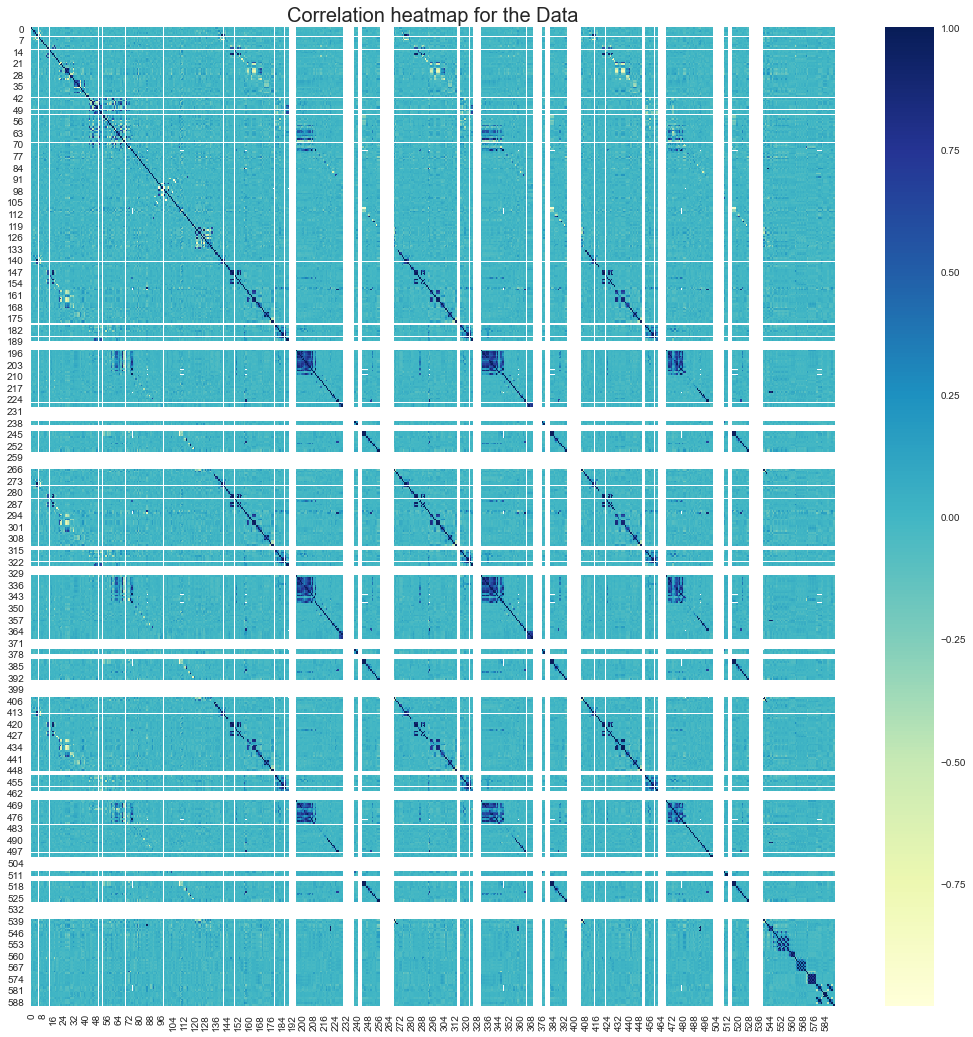

In [16]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df1.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

In [80]:
#Final shape after modification 

df1.shape

(1567, 591)

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e8;"> Data analysis & visualisation
    


In [21]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Class
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [22]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Class
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.933631
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


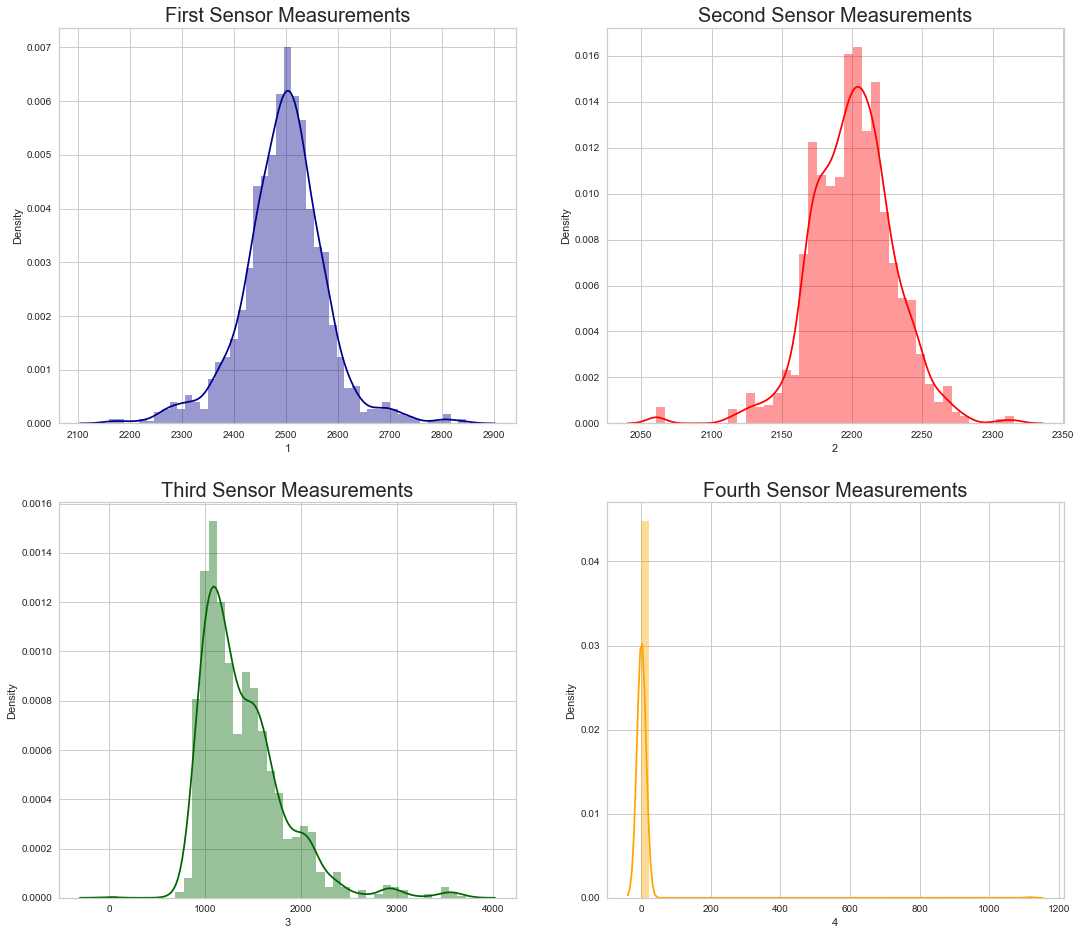

In [23]:
# distribution plot to see first four column's distribution

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(df1['1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(df1['2'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(df1['3'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(df1['4'], color = 'orange')
plt.title('Fourth Sensor Measurements', fontsize = 20)

plt.show()

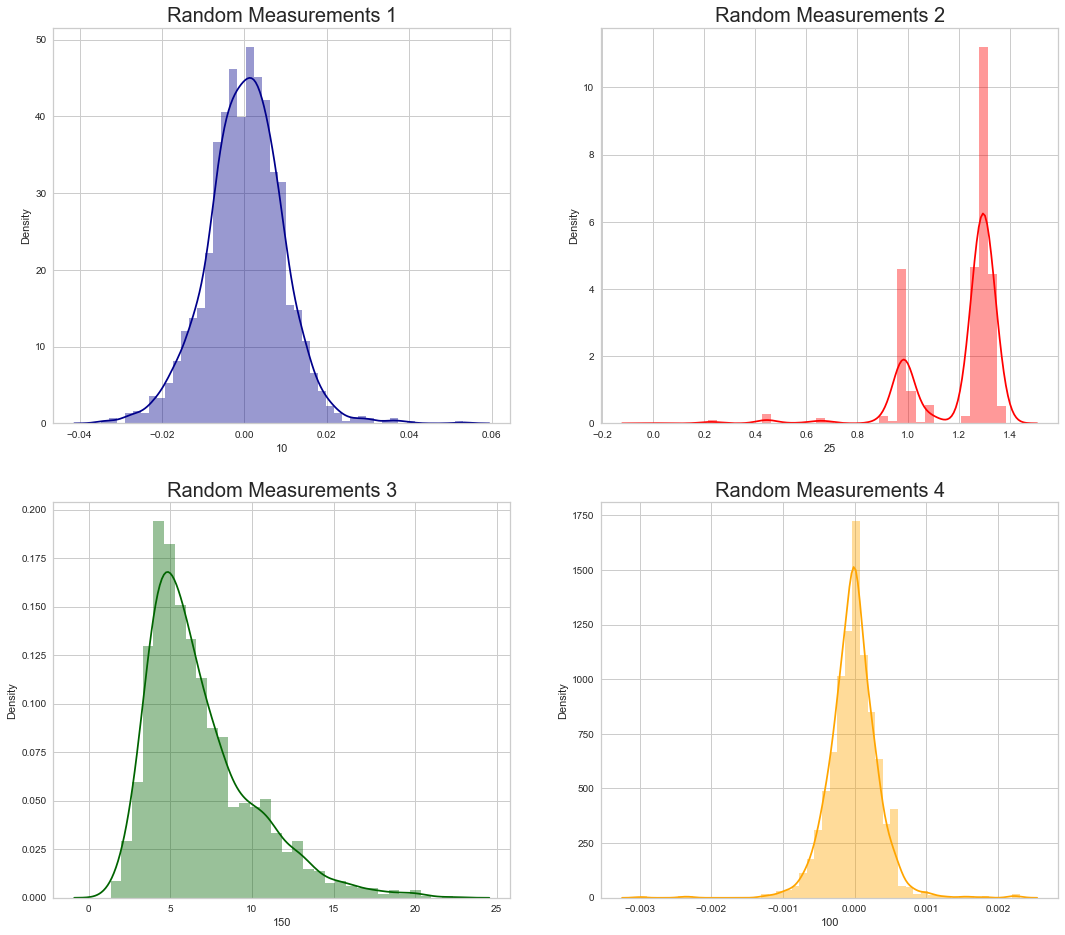

In [20]:
# distribution plot to see random column's distribution

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(df1['10'], color = 'darkblue')
plt.title('Random Measurements 1', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(df1['25'], color = 'red')
plt.title('Random Measurements 2', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(df1['150'], color = 'darkgreen')
plt.title('Random Measurements 3', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(df1['100'], color = 'orange')
plt.title('Random Measurements 4', fontsize = 20)

plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e8;"> Data PreProcessing
    


In [84]:
df1.isna().sum().sum() #total number of missing values

41951

### Type 1 - Imputing all na values

In [85]:
# impute missing values and save it as a temporary dataset.
imputer = KNNImputer()
imputer.fit(df1)
imputed_df1 = pd.DataFrame(imputer.transform(df1), columns = df1.columns)
# imputed_test = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)

In [89]:
imputed_df1.isna().any().any() #re checking

False

In [97]:
imputed_df1.shape

(1567, 591)

### Type 2 - dropping the columns which has more than 50% of na and imputing the column with has less than 50% of data.

In [91]:
# Percentage  of missing values in columns
def percentna(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold]
    return columns.tolist()

In [92]:
na_columns= percentna(df1, 0.5)
df1_nona = df1.drop(na_columns, axis=1)
n_features1 = df1_nona.shape[1]
print(f'After removing {len(na_columns)} features, there are {n_features1} features left.')

After removing 32 features, there are 559 features left.


In [99]:
df1_nona.isna().any().any() # nulll value present in less that 50% of dataset

True

In [273]:
# impute missing values and save it as a temporary dataset.
imputer = KNNImputer()
imputer.fit(df1_nona)
imputed_df1_nona = pd.DataFrame(imputer.transform(df1_nona), columns = df1_nona.columns)

In [274]:
imputed_df1_nona.isna().any().any() # re checking

False

In [275]:
imputed_df1_nona.shape

(1567, 559)

### Comparing Type 1 and Type 2 set, we see high number of feature droped in Type 2 bcz we remove column which has more than 50% na. 

### Filling all na with imputed values are not good. So simply drop the column with greater than threshold value

In [276]:
#Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [277]:
#Remove columns having more than 85% correlation
#Both positive and negative correlations are considered here
imputed_df1_nona= remove_collinear_features(imputed_df1_nona,0.85)

27 | 25 | 0.98
30 | 29 | 0.86
36 | 34 | 1.0
50 | 46 | 0.9
54 | 53 | 0.94
60 | 43 | 0.9
70 | 66 | 0.9
96 | 94 | 0.96
98 | 96 | 0.87
101 | 98 | 0.91
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
123 | 121 | 0.94
124 | 121 | 0.89
124 | 123 | 0.86
127 | 122 | 0.96
140 | 4 | 1.0
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.87
154 | 148 | 0.94
154 | 152 | 0.89
164 | 163 | 0.92
165 | 163 | 0.9
165 | 164 | 0.96
174 | 172 | 1.0
196 | 67 | 0.86
197 | 67 | 0.86
197 | 196 | 0.9
199 | 196 | 0.94
204 | 67 | 0.9
204 | 196 | 0.87
205 | 67 | 0.87
205 | 196 | 0.86
206 | 74 | 1.0
207 | 67 | 0.86
207 | 196 | 0.92
207 | 197 | 0.87
207 | 199 | 0.88
207 | 203 | 0.86
207 | 204 | 0.87
207 | 205 | 0.87
209 | 74 | 1.0
209 | 206 | 1.0
249 | 114 | 0.98
252 | 117 | 0.99
270 | 135 | 0.95
271 | 136 | 0.97
272 | 137 | 0.98
273 | 138 | 0.92
274 | 139 | 0.99
275 | 4 | 1.0
275 | 140 | 1.0
277 | 142 | 0.97
278 | 143 | 0.91
279 | 144 | 0.98
280 | 145 | 0.9

In [278]:
imputed_df1_nona.shape # From 559, it is dropped to 350

(1567, 350)

In [289]:
# Let we see the Features corelation with the target varible and drop the low correlated feature with given threshold value.

def corrwith_target(dataframe, target, threshold):
    cor = dataframe.corr()
    #Correlation with output variable
    cor_target = abs(cor[target])
    #Selecting non correlated features
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

In [290]:
corrwith_cols = corrwith_target(imputed_df1_nona, 'Class', 0.05)
imputed_df1_nona = imputed_df1_nona.drop(corrwith_cols, axis=1)
n_features4 = imputed_df1_nona.shape[1]
print(f'After removing {len(corrwith_cols)} features, there are {n_features4} features left.')

After removing 185 features, there are 165 features left.


In [292]:
imputed_df1_nona.shape # From 559, it is dropped to 165

(1567, 165)

In [293]:
# separating the dependent and independent data

X = imputed_df1_nona.iloc[:,:164]
y = imputed_df1_nona["Class"]

# getting the shapes of new data sets x and y
print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (1567, 164)
shape of y: (1567,)


In [294]:
# splitting them into train test and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (1096, 164)
shape of X_test:  (471, 164)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [295]:
y.value_counts()

1.0    1463
0.0     104
Name: Class, dtype: int64

In [296]:
y_train.value_counts()

1.0    1024
0.0      72
Name: Class, dtype: int64

### Target variable imbalancing

In [297]:
imputed_df1_nona.describe(include='all')

,5,13,14,21,22,26,28,32,33,38,...,536,537,538,542,543,550,551,573,589,Class
count,1567.0,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.0,1567.0,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,100.0,0.0,9.006432,-5618.753446,2699.480345,1.938495,69.499516,85.337813,8.960025,86.836517,...,0.0,0.0,0.0,0.111208,0.008472,17.179133,1.244484,0.345636,99.648308,0.933631
std,0.0,0.0,2.794096,626.532913,295.328946,0.189376,3.459559,2.025948,1.344064,0.446619,...,0.0,0.0,0.0,0.002736,0.001533,4.617054,1.260796,0.248478,93.865888,0.249005
min,100.0,0.0,2.249300,-7150.250000,0.000000,0.000000,59.400000,83.182900,7.603200,84.732700,...,0.0,0.0,0.0,0.105300,0.005100,6.110000,0.120000,0.066700,0.000000,0.000000
25%,100.0,0.0,7.096750,-5934.625000,2578.125000,1.906750,67.383350,84.490500,8.580000,86.578300,...,0.0,0.0,0.0,0.109600,0.007800,14.740000,0.910000,0.242250,44.368600,1.000000
50%,100.0,0.0,8.973900,-5523.250000,2664.000000,1.986300,69.155600,85.140400,8.769600,86.820700,...,0.0,0.0,0.0,0.109600,0.007800,16.970000,1.212000,0.293400,71.778000,1.000000
75%,100.0,0.0,10.858700,-5356.625000,2840.625000,2.003200,72.255550,85.741900,9.060600,87.002400,...,0.0,0.0,0.0,0.113400,0.009000,18.915000,1.376000,0.366900,114.749700,1.000000
max,100.0,0.0,19.546500,0.000000,3656.250000,2.052800,77.900000,105.603800,23.345300,88.418800,...,0.0,0.0,0.0,0.118400,0.024000,131.680000,39.330000,2.196700,737.304800,1.000000


In [298]:
X.describe(include='all')

,5,13,14,21,22,26,28,32,33,38,...,535,536,537,538,542,543,550,551,573,589
count,1567.0,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.0,1567.0,1567.0,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,100.0,0.0,9.006432,-5618.753446,2699.480345,1.938495,69.499516,85.337813,8.960025,86.836517,...,0.0,0.0,0.0,0.0,0.111208,0.008472,17.179133,1.244484,0.345636,99.648308
std,0.0,0.0,2.794096,626.532913,295.328946,0.189376,3.459559,2.025948,1.344064,0.446619,...,0.0,0.0,0.0,0.0,0.002736,0.001533,4.617054,1.260796,0.248478,93.865888
min,100.0,0.0,2.249300,-7150.250000,0.000000,0.000000,59.400000,83.182900,7.603200,84.732700,...,0.0,0.0,0.0,0.0,0.105300,0.005100,6.110000,0.120000,0.066700,0.000000
25%,100.0,0.0,7.096750,-5934.625000,2578.125000,1.906750,67.383350,84.490500,8.580000,86.578300,...,0.0,0.0,0.0,0.0,0.109600,0.007800,14.740000,0.910000,0.242250,44.368600
50%,100.0,0.0,8.973900,-5523.250000,2664.000000,1.986300,69.155600,85.140400,8.769600,86.820700,...,0.0,0.0,0.0,0.0,0.109600,0.007800,16.970000,1.212000,0.293400,71.778000
75%,100.0,0.0,10.858700,-5356.625000,2840.625000,2.003200,72.255550,85.741900,9.060600,87.002400,...,0.0,0.0,0.0,0.0,0.113400,0.009000,18.915000,1.376000,0.366900,114.749700
max,100.0,0.0,19.546500,0.000000,3656.250000,2.052800,77.900000,105.603800,23.345300,88.418800,...,0.0,0.0,0.0,0.0,0.118400,0.024000,131.680000,39.330000,2.196700,737.304800


### On comparing the original data with tts data. We see the similar statistical character.

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e8;"> Model training, testing and tuning:
    


## Feature Selection and Selcted model Logistic Regression

In [451]:
def evaluate(train_df, test_df, train_target, test_target):
    
    # first, we should scale our data so logistic regression works better
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    # training the model
    logreg = LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear')

    logreg.fit(train_std, train_target.values.ravel())

    
    # evaluation and scoring
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
    print("train score:",logreg.score(train_std, train_target))
    print("test score:", logreg.score(test_std,test_target))
    
    # visualizations
    cre = ClassPredictionError(logreg, classes=['fail', 'pass'])
    cre.score(test_std, y_true)
    cre.show()
    cm = ConfusionMatrix(logreg, classes=['fail', 'pass'])
    plt.rcParams['figure.figsize'] = (7, 5)
    sns.set(style = 'dark', font_scale = 1.4)
    cm.score(test_std, y_true)
    cm.show()
    rocauc = plot_roc_curve(logreg, test_std, y_true)
    plt.show()
    
    print('Classfication Report')
    print(metrics.classification_report(y_true, y_pred))

    print('Confusion Matrix')
    print(metrics.confusion_matrix(y_true, y_pred))
    
    return f1score, mccscore



train score: 0.8029197080291971
test score: 0.7261146496815286


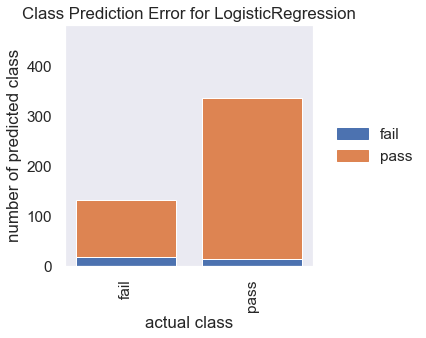

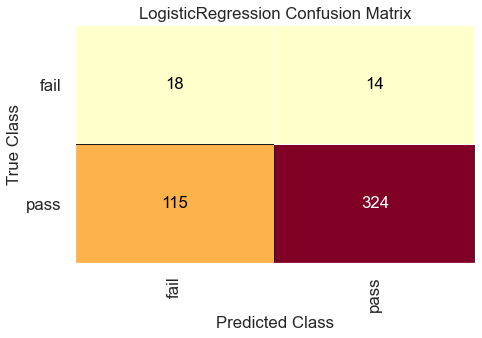

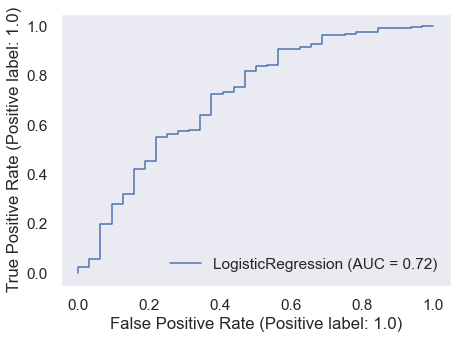

Classfication Report
              precision    recall  f1-score   support

         0.0       0.14      0.56      0.22        32
         1.0       0.96      0.74      0.83       439

    accuracy                           0.73       471
   macro avg       0.55      0.65      0.53       471
weighted avg       0.90      0.73      0.79       471

Confusion Matrix
[[ 18  14]
 [115 324]]


(0.7261146496815287, 0.16800678031396757)

In [452]:
evaluate(X_train,X_test,y_train,y_test) 

### Here We see F1 score with 72% with 164 feature. Last we seen 84% in F1 score with 349 features.

### we have reduced , approx half the data set features, but there is only 9% drop in F1 score. Thats good sign.

## Applying CV on the last drived dataset

In [4]:
#let combine X_train and X_test into single data set for CV purpose.
dfcv = pd.concat([X_test.assign(ind="test"), X_train.assign(ind="train")])

# test, train = dfcv[dfcv["ind"].eq("test")], dfcv[dfcv["ind"].eq("train")] later we can split into X train and X test.

NameError: name 'X_test' is not defined

In [1]:
dfcvX = dfcv.iloc[:,:164]

NameError: name 'dfcv' is not defined

In [307]:
num_folds = 100
seed = 7

kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, dfcvX, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.         1.         0.8125     0.9375     0.9375     0.9375
 1.         0.9375     1.         0.875      0.9375     0.875
 0.9375     0.875      0.9375     1.         0.875      0.9375
 0.8125     0.8125     1.         0.9375     1.         1.
 1.         1.         0.875      0.875      0.9375     1.
 1.         0.9375     0.8125     0.8125     0.9375     0.9375
 1.         0.9375     1.         0.9375     0.8125     0.9375
 0.9375     0.9375     0.9375     0.875      0.9375     1.
 0.9375     1.         1.         0.9375     0.875      0.9375
 0.875      0.875      0.9375     1.         0.875      1.
 0.9375     0.9375     0.875      0.8125     0.875      1.
 1.         1.         0.93333333 0.93333333 0.93333333 1.
 1.         1.         1.         0.93333333 0.86666667 1.
 0.86666667 0.93333333 1.         0.93333333 0.93333333 1.
 0.93333333 1.         1.         0.86666667 0.86666667 1.
 0.8        0.8        0.86666667 1.         1.         0.86666667
 0.86666667 0.93333333 0.

### On applying CV to dataset with 164 features we are getting an CV score as 93%

### Hyper Tuning Parameter using Grid Search on LR model

In [308]:
# Creating an scaler object
std_slc = StandardScaler()
# Creating a pca object
pca = decomposition.PCA()
# Creating a logistic regression object
logistic_Reg = linear_model.LogisticRegression()

# Creating a pipeline of three steps. First, standardizing the data.
# Second, tranforming the data with PCA.
# Third, training a logistic regression on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

# Creating Parameter Space
# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,10,1))
# Creating a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)
# Creating a list of options for the regularization penalty
penalty = ['l1', 'l2']
# Creating a dictionary of all the parameter options 
# Note has we can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(dfcvX, y)
# Viewing The Best Parameters
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.0001
Best Number Of Components: 1

LogisticRegression(C=0.0001)


On computing with 164 pca components , we yeild the same results as above.But the computational time exceeds more than half hour. So, after seeing the result of 164 pcacomponents, i Reduced n_Componetns to in range of 10, which took 5 min to give the same result.

In [448]:
 # Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf_GS, dfcvX, y, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())    
    


[0.93367347 0.93367347 0.93367347 0.93350384]

0.9336310611201002

7.345327423925284e-05


In [310]:
clf_GS.best_estimator_

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA(n_components=1)),
                ('logistic_Reg', LogisticRegression(C=0.0001))])

## We see with PCA components of 1, achieved 93% score in cross validation

## Also we compared the CV score with 166 features and CV score with 1 PCA components, both giving the same 93% 

# Another method to reduce Dimension

## Recursive feature elimination with cross-validation

#### This also takes high computational time because of high features

In [313]:
#we are going to use Recursive feature elimination with cross-validation 
#to find the optimum number of features from the remaining 166 features.

scaler = StandardScaler()
scaler.fit(X_train)


X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


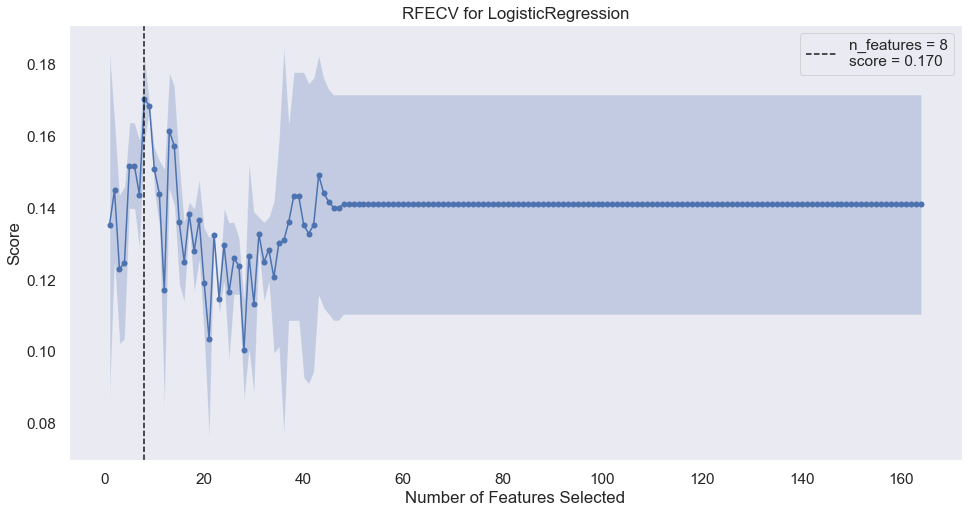

<AxesSubplot:title={'center':'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [314]:
mcc_scorer = make_scorer(matthews_corrcoef)
rfecv = RFECV(estimator=LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear'),
              cv=StratifiedKFold(2),
              scoring =  mcc_scorer)
plt.rcParams['figure.figsize'] = (16, 8)
sns.set(style = 'dark', font_scale = 1.4)
rfecv.fit(X_train_std, y_train.values.ravel())
rfecv.show()

## Ah!..we started with 592 features and now, we ended up with 8, let we do evalution on this set

In [315]:
mask = rfecv.get_support()
columns = X_train.columns
selected_cols = columns[mask]
n_features5 = len(selected_cols)
X_train_rfe = pd.DataFrame(rfecv.transform(X_train), columns = selected_cols)
X_test_rfe = pd.DataFrame(rfecv.transform(X_test), columns = selected_cols)

train score: 0.7271897810218978
test score: 0.7409766454352441


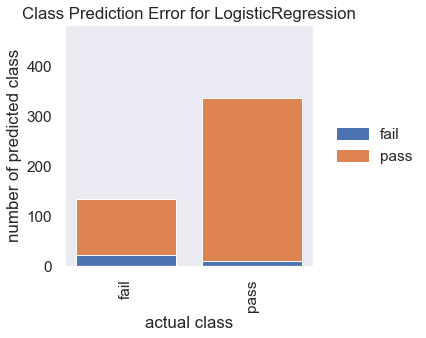

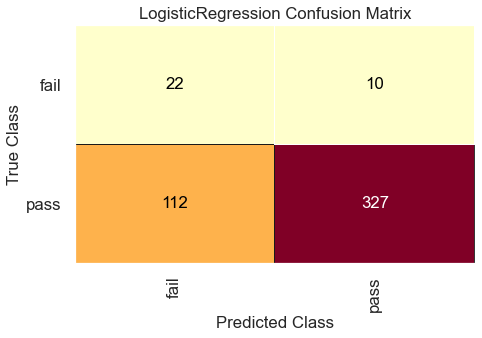

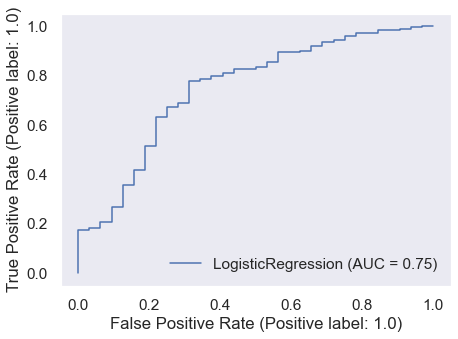

Classfication Report
              precision    recall  f1-score   support

         0.0       0.16      0.69      0.27        32
         1.0       0.97      0.74      0.84       439

    accuracy                           0.74       471
   macro avg       0.57      0.72      0.55       471
weighted avg       0.92      0.74      0.80       471

Confusion Matrix
[[ 22  10]
 [112 327]]


(0.7409766454352441, 0.2411571755210881)

In [453]:
evaluate(train_df = X_train_rfe, test_df = X_test_rfe, train_target=y_train, test_target=y_test)

### Here We see F1 score with 74% with 8 feature. Last we seen 75% in F1 score with 166 features.

### we have reduced , approx 80% the data set features, but there is only 1% drop in F1 score. Thats great...

### Since the target is imbalanced - we need to see the f1 score, which is 84% for class 1 i.e Pass class.

In [322]:
# New population

X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(dfcvX,y,test_size=0.3,random_state=56)

# gettiing the shapes
print("shape of X_train: ", X_train_new.shape)
print("shape of X_test: ", X_test_new.shape)
print("shape of y_train: ", y_train_new.shape)
print("shape of y_test: ", y_test_new.shape)

shape of X_train:  (1096, 164)
shape of X_test:  (471, 164)
shape of y_train:  (1096,)
shape of y_test:  (471,)


train score: 0.6751824817518248
test score: 0.6581740976645435


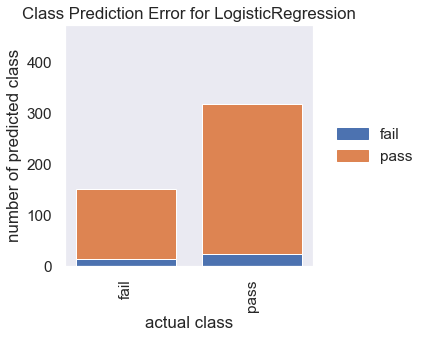

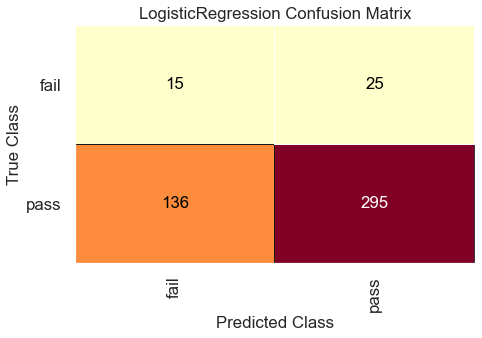

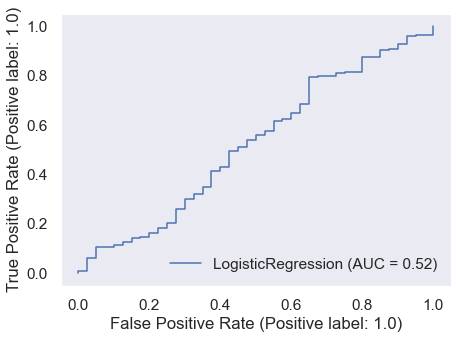

Classfication Report
              precision    recall  f1-score   support

         0.0       0.10      0.38      0.16        40
         1.0       0.92      0.68      0.79       431

    accuracy                           0.66       471
   macro avg       0.51      0.53      0.47       471
weighted avg       0.85      0.66      0.73       471

Confusion Matrix
[[ 15  25]
 [136 295]]


(0.6581740976645435, 0.03551336065448672)

In [454]:
evaluate(X_train_new,X_test_new,y_train_new,y_test_new)

### On fitting different population into the model, we see the f1 score to be 65%

#### On trying differnet samples we can able to see the f1 score varies from 60 to 66 %

## Random forest

## The dataset at this point has 164 variables. We will use the Random Forest to rank the variables in terms of their importance.



In [336]:
#Random Forest modelling

tree_model = BalancedRandomForestClassifier(n_estimators=100)
tree_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}

In [343]:
tree_model.fit(X_train,y_train)
predictions = tree_model.predict(X_test)
print("train score:",tree_model.score(X_train, y_train))
print("test score:", tree_model.score(X_test,y_test))
print("Number of columns: ",len(X_train.columns))
print("test precision for fail: ",precision_score(y_test,predictions, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test,predictions, pos_label=0))
print("test precision for pass: ",precision_score(y_test,predictions, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test,predictions, pos_label=1))


train score: 0.7463503649635036
test score: 0.7006369426751592
Number of columns:  164
test precision for fail:  0.17365269461077845
test recall for fail:  0.90625
test precision for pass:  0.9901315789473685
test recall for pass:  0.6856492027334852


In [345]:
print('Classfication Report')
print(metrics.classification_report(y_test,predictions))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,predictions))

Classfication Report
              precision    recall  f1-score   support

         0.0       0.17      0.91      0.29        32
         1.0       0.99      0.69      0.81       439

    accuracy                           0.70       471
   macro avg       0.58      0.80      0.55       471
weighted avg       0.93      0.70      0.77       471

Confusion Matrix
[[ 29   3]
 [138 301]]


In [346]:
# #Try to improve the score with grid search
# tree_params = [{
    
#     "n_estimators":range(100,1000)
# }]
# grid_search_tree = GridSearchCV(tree_model, tree_params, cv=5, n_jobs=-1)
# %time grid_search_tree.fit(X_train, y_train)

# print("best params:",grid_search_tree.best_params_)
# print("best score:",grid_search_tree.best_score_)

# Wall time: 53min 26s
# best params: {'n_estimators': 258}
# best score: 0.7116811955168119


Wall time: 53min 26s
best params: {'n_estimators': 258}
best score: 0.7116811955168119


## Optimized RF with 8 feature determined in Recurisve Elimation method.

In [351]:
#Random Forest modelling

tree_model_opt = BalancedRandomForestClassifier(n_estimators=1000)
tree_model_opt.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}

In [473]:
tree_model_opt.fit(X_train,y_train)
predictions_opt = tree_model_opt.predict(X_test)
RFtrain =tree_model_opt.score(X_train, y_train)
RFtest = tree_model_opt.score(X_test,y_test)
print("Train Score",RFtrain)
print("Test Score",RFtest)
print("Number of columns: ",len(X_train.columns))
print("test precision for fail: ",precision_score(y_test,predictions_opt, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test,predictions_opt, pos_label=0))
print("test precision for pass: ",precision_score(y_test,predictions_opt, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test,predictions_opt, pos_label=1))




print('Classfication Report')
print(metrics.classification_report(y_test,predictions_opt))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,predictions_opt))

Train Score 0.760036496350365
Test Score 0.7197452229299363
Number of columns:  164
test precision for fail:  0.18354430379746836
test recall for fail:  0.90625
test precision for pass:  0.9904153354632588
test recall for pass:  0.7061503416856492
Classfication Report
              precision    recall  f1-score   support

         0.0       0.18      0.91      0.31        32
         1.0       0.99      0.71      0.82       439

    accuracy                           0.72       471
   macro avg       0.59      0.81      0.56       471
weighted avg       0.94      0.72      0.79       471

Confusion Matrix
[[ 29   3]
 [129 310]]


In [ ]:
# train score: 0.7463503649635036
# test score: 0.7006369426751592
# Number of columns:  164
# test precision for fail:  0.17365269461077845
# test recall for fail:  0.90625
# test precision for pass:  0.9901315789473685
# test recall for pass:  0.6856492027334852

<AxesSubplot:xlabel='importance', ylabel='feature'>

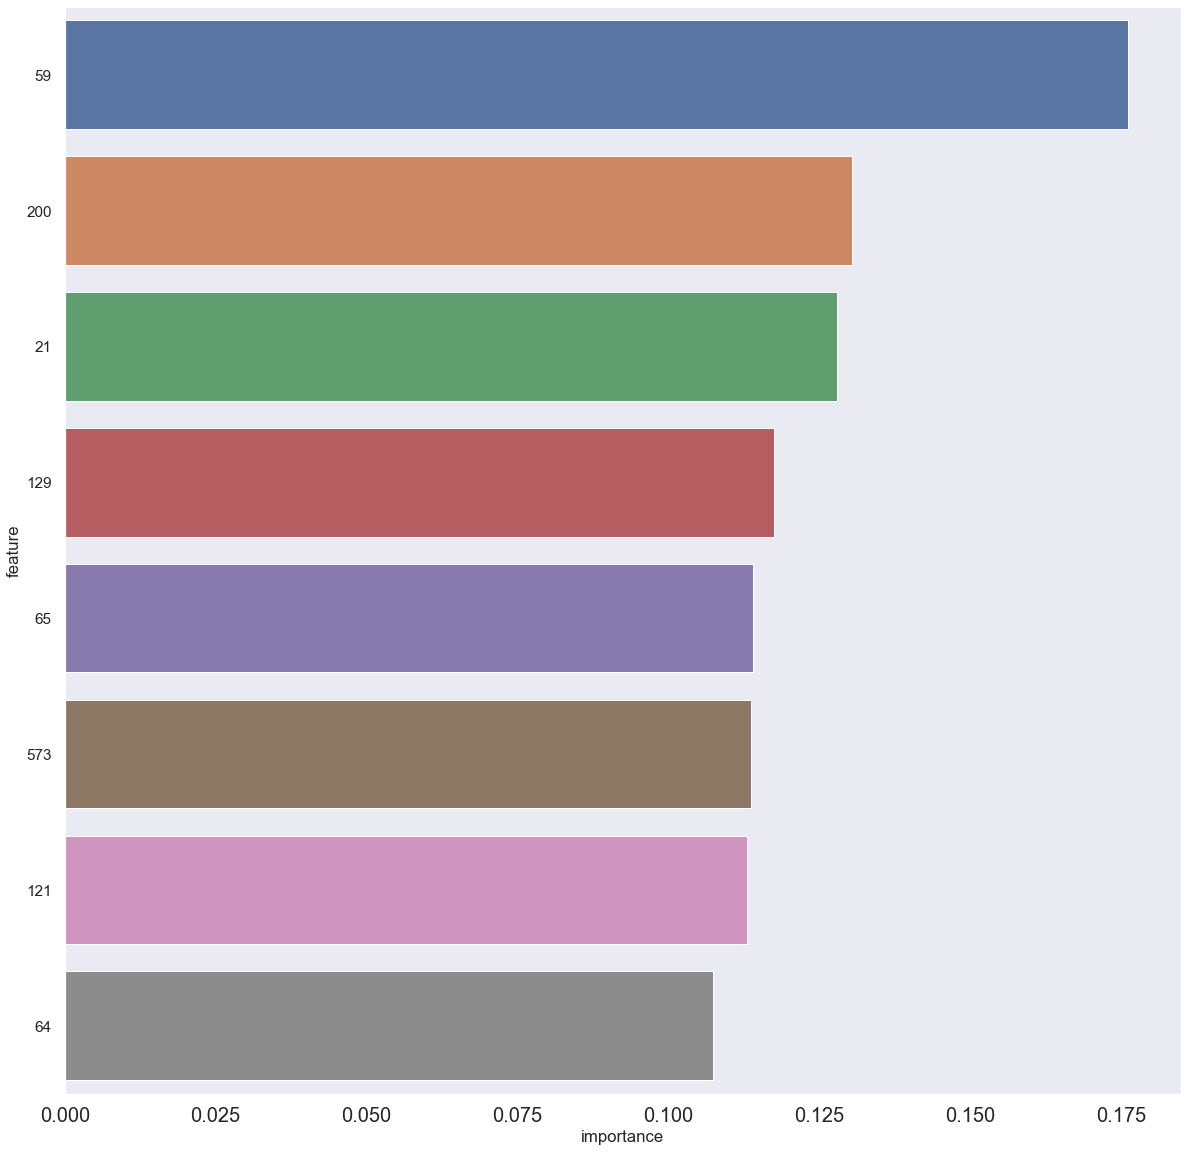

In [363]:
tree_model_params = pd.DataFrame({'feature':X_train_rfe.columns,'importance':tree_model_opt.feature_importances_}).sort_values(by='importance',ascending=False)
tree_model_params.to_csv("tree_model_params.csv")
plt.rcParams['figure.figsize'] = [20, 20]
plt.xticks(fontsize=20)
sns.barplot(x=tree_model_params['importance'],y=tree_model_params['feature'])

In [371]:
#Trying CV on dataset with 164 features
num_folds = 100
seed = 7

kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
results = cross_val_score(tree_model_opt, dfcvX, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.5625     0.4375     0.625      0.5        0.5        0.4375
 0.5625     0.25       0.4375     0.375      0.5625     0.4375
 0.3125     0.4375     0.6875     0.5625     0.3125     0.5
 0.375      0.625      0.375      0.5625     0.6875     0.3125
 0.5625     0.375      0.4375     0.375      0.6875     0.3125
 0.3125     0.5625     0.75       0.4375     0.5625     0.4375
 0.5        0.3125     0.5625     0.25       0.5625     0.5625
 0.5625     0.625      0.4375     0.625      0.4375     0.375
 0.5625     0.75       0.5        0.3125     0.625      0.4375
 0.5625     0.6875     0.4375     0.4375     0.375      0.25
 0.4375     0.375      0.375      0.6875     0.375      0.625
 0.5        0.66666667 0.53333333 0.6        0.33333333 0.33333333
 0.66666667 0.53333333 0.6        0.8        0.73333333 0.46666667
 0.6        0.46666667 0.4        0.33333333 0.13333333 0.2
 0.66666667 0.13333333 0.73333333 0.6        0.26666667 0.2
 0.4        0.53333333 0.6        0.4        0.66666667 0.53

In [370]:
#Trying CV on dataset with 8 feature
#let combine X_train and X_test into single data set for CV purpose.
dfrf = pd.concat([X_test_rfe.assign(ind="test"), X_train_rfe.assign(ind="train")])
dfrfX = dfcv.iloc[:,:8]
num_folds = 100
seed = 7

kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
results = cross_val_score(tree_model_opt, dfrfX, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.5        0.375      0.4375     0.3125     0.5625     0.5625
 0.5        0.25       0.5        0.3125     0.3125     0.375
 0.375      0.5        0.625      0.6875     0.5625     0.375
 0.5625     0.5625     0.375      0.5625     0.625      0.375
 0.5625     0.5625     0.5        0.4375     0.5625     0.5
 0.5        0.5        0.5        0.4375     0.625      0.4375
 0.5625     0.4375     0.3125     0.4375     0.375      0.6875
 0.6875     0.5        0.5        0.9375     0.5        0.625
 0.4375     0.8125     0.5        0.4375     0.375      0.4375
 0.5        0.625      0.375      0.4375     0.625      0.5
 0.5625     0.4375     0.5625     0.375      0.3125     0.4375
 0.4375     0.4        0.46666667 0.33333333 0.66666667 0.53333333
 0.6        0.26666667 0.66666667 0.46666667 0.26666667 0.73333333
 0.6        0.4        0.4        0.6        0.33333333 0.4
 0.6        0.2        0.6        0.66666667 0.4        0.46666667
 0.53333333 0.33333333 0.66666667 0.46666667 0.53333333 

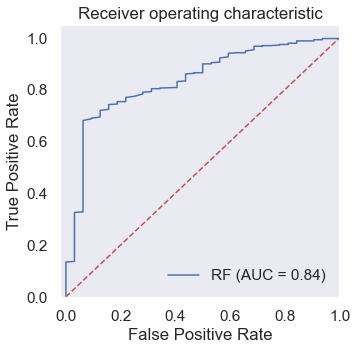

In [433]:
#plotting ROC and AUC
probs = tree_model_opt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

## It is seen from the kfold CV, that 164 feature and 8 feature dataset shows same CV Score 48% with std deviation of 14%

In [476]:
#let fit different sample in the model and find the accuracy 

tree_model_opt_new = BalancedRandomForestClassifier(n_estimators=1000)

tree_model_opt_new.fit(X_train_new,y_train_new)
predictions_opt1 = tree_model_opt_new.predict(X_test_new)
RFtrainnew=tree_model_opt_new.score(X_train_new, y_train_new)
RFtestnew= tree_model_opt_new.score(X_test_new,y_test_new)
print("Train Score",RFtrainnew)
print("Test Score",RFtestnew)
print("Number of columns: ",len(X_train_new.columns))
print("test precision for fail: ",precision_score(y_test_new,predictions_opt1, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test_new,predictions_opt1, pos_label=0))
print("test precision for pass: ",precision_score(y_test_new,predictions_opt1, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test_new,predictions_opt1, pos_label=1))



print('Classfication Report')
print(metrics.classification_report(y_test_new,predictions_opt1))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test_new,predictions_opt1))

Train Score 0.656021897810219
Test Score 0.4840764331210191
Number of columns:  164
test precision for fail:  0.0823045267489712
test recall for fail:  0.5
test precision for pass:  0.9122807017543859
test recall for pass:  0.48259860788863107
Classfication Report
              precision    recall  f1-score   support

         0.0       0.08      0.50      0.14        40
         1.0       0.91      0.48      0.63       431

    accuracy                           0.48       471
   macro avg       0.50      0.49      0.39       471
weighted avg       0.84      0.48      0.59       471

Confusion Matrix
[[ 20  20]
 [223 208]]


## Fitting new samples in this model results in low accuracy

## RF model lags LR Model in accuracy

# XGBoost Algorithm

In [390]:
XGmodel = XGBClassifier(random_state=1)
%time XGmodel.fit(X_train, y_train)



[12:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 435 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [478]:
predictionsXG = XGmodel.predict(X_test)
XGBtrain=XGmodel.score(X_train, y_train)
XGBtest=XGmodel.score(X_test, y_test)
print("Train Score",XGBtrain)
print("Test Score",XGBtest)
print("Number of columns: ",len(X_train.columns))
print("test precision for fail: ",precision_score(y_test,predictionsXG, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test,predictionsXG, pos_label=0))
print("test precision for pass: ",precision_score(y_test,predictionsXG, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test,predictionsXG, pos_label=1))



print('Classfication Report')
print(metrics.classification_report(y_test,predictionsXG))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,predictionsXG))

Train Score 1.0
Test Score 0.9320594479830149
Number of columns:  164
test precision for fail:  0.5
test recall for fail:  0.03125
test precision for pass:  0.9339019189765458
test recall for pass:  0.9977220956719818
Classfication Report
              precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        32
         1.0       0.93      1.00      0.96       439

    accuracy                           0.93       471
   macro avg       0.72      0.51      0.51       471
weighted avg       0.90      0.93      0.90       471

Confusion Matrix
[[  1  31]
 [  1 438]]


In [392]:
#Trying CV on dataset with 164 features
num_folds = 100

kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
results = cross_val_score(XGmodel, dfcvX, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[12:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [397]:
#Trying CV on dataset with 8 feature
#let combine X_train and X_test into single data set for CV purpose.
# dfrf = pd.concat([X_test_rfe.assign(ind="test"), X_train_rfe.assign(ind="train")])
# dfrfX = dfcv.iloc[:,:8]
num_folds = 100
seed = 7
kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
results = cross_val_score(XGmodel, dfrfX, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[13:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

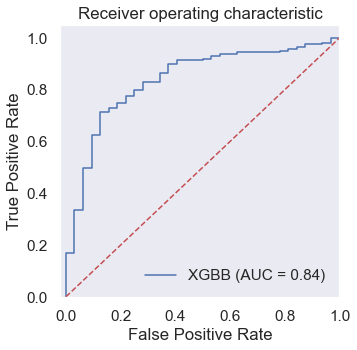

In [430]:
#plotting ROC and AUC
probs = XGmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_xgb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='XGBB (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

###  164 features shows 93.3% and reduced 8 features shows 92.6%.

In [479]:
#let fit different sample in the model and find the accuracy 

XGB_new = XGBClassifier(random_state=1)
%time XGB_new.fit(X_train_new, y_train_new)

predictions_opt2 = XGB_new.predict(X_test_new)
XGBtrainnew=XGB_new.score(X_train_new, y_train_new)
XGBtestnew=XGB_new.score(X_test_new,y_test_new)
print("Train Score",XGBtrainnew)
print("Test Score",XGBtestnew)
print("Number of columns: ",len(X_train_new.columns))
print("test precision for fail: ",precision_score(y_test_new,predictions_opt2, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test_new,predictions_opt2, pos_label=0))
print("test precision for pass: ",precision_score(y_test_new,predictions_opt2, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test_new,predictions_opt2, pos_label=1))



print('Classfication Report')
print(metrics.classification_report(y_test_new,predictions_opt2))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test_new,predictions_opt2))

[19:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 682 ms
Train Score 1.0
Test Score 0.9150743099787686
Number of columns:  164
test precision for fail:  0.0
test recall for fail:  0.0
test precision for pass:  0.9150743099787686
test recall for pass:  1.0
Classfication Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        40
         1.0       0.92      1.00      0.96       431

    accuracy                           0.92       471
   macro avg       0.46      0.50      0.48       471
weighted avg       0.84      0.92      0.87       471

Confusion Matrix
[[  0  40]
 [  0 431]]


## Fitting new samples in this model results in more or less same accuracy -- > around 93%

## XGB model accuracy leads LR Model & RF model

# Naive bayes Model

In [402]:
# creatw the model
nbmodel = GaussianNB()

nbmodel.fit(X_train, y_train.ravel())

GaussianNB()

In [461]:
predictionsnb = nbmodel.predict(X_test)
print("train score:",nbmodel.score(X_train, y_train))
print("test score:", nbmodel.score(X_test,y_test))
print("Number of columns: ",len(X_train.columns))
print("test precision for fail: ",precision_score(y_test,predictionsnb, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test,predictionsnb, pos_label=0))
print("test precision for pass: ",precision_score(y_test,predictionsnb, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test,predictionsnb, pos_label=1))



print('Classfication Report')
print(metrics.classification_report(y_test,predictionsnb))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,predictionsnb))

train score: 0.9032846715328468
test score: 0.8726114649681529
Number of columns:  164
test precision for fail:  0.13157894736842105
test recall for fail:  0.15625
test precision for pass:  0.9376443418013857
test recall for pass:  0.9248291571753986
Classfication Report
              precision    recall  f1-score   support

         0.0       0.13      0.16      0.14        32
         1.0       0.94      0.92      0.93       439

    accuracy                           0.87       471
   macro avg       0.53      0.54      0.54       471
weighted avg       0.88      0.87      0.88       471

Confusion Matrix
[[  5  27]
 [ 33 406]]


### From Navie Bayes - we got the accuaracy of 87%

In [404]:
#Trying CV on dataset with 164 features
num_folds = 100

kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
results = cross_val_score(nbmodel, dfcvX, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.625      0.6875     0.5625     0.25       0.5625     0.5
 0.625      0.75       0.625      0.5625     0.6875     0.6875
 0.6875     0.875      0.9375     0.75       0.3125     0.8125
 0.75       0.8125     0.6875     0.625      0.6875     0.75
 0.625      0.625      0.8125     0.75       0.6875     0.6875
 0.5        0.4375     0.625      0.5625     0.625      0.75
 0.5        0.625      0.5625     0.75       0.8125     0.625
 0.6875     0.5        0.75       0.8125     0.5625     0.5625
 0.5        0.5625     0.6875     0.3125     0.75       0.4375
 0.6875     0.75       0.4375     0.9375     0.6875     0.875
 0.375      0.4375     0.625      0.625      0.5        0.875
 0.625      0.6        0.53333333 0.6        0.73333333 0.6
 0.73333333 0.73333333 0.86666667 0.66666667 0.66666667 0.73333333
 0.66666667 0.73333333 0.6        0.6        0.53333333 0.4
 0.46666667 0.4        0.66666667 0.8        0.66666667 0.4
 0.6        0.4        0.66666667 0.73333333 0.8        0.66666667
 0.

In [406]:
#Trying CV on dataset with 8 feature
#let combine X_train and X_test into single data set for CV purpose.
kfold = KFold(n_splits=num_folds, random_state=42,shuffle=True)
results = cross_val_score(nbmodel, dfrfX, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.9375     1.         0.8125     0.9375     0.9375     0.875
 0.875      0.9375     1.         0.875      0.9375     0.875
 0.9375     0.875      0.9375     1.         0.8125     0.9375
 0.8125     0.8125     1.         0.875      1.         0.9375
 1.         1.         0.875      0.875      0.9375     1.
 1.         0.9375     0.75       0.8125     0.9375     0.875
 1.         0.9375     0.9375     0.9375     0.8125     0.875
 0.9375     0.875      0.9375     0.875      0.9375     1.
 0.9375     1.         0.875      0.9375     0.8125     0.875
 0.875      0.875      0.875      1.         0.8125     1.
 0.9375     0.9375     0.875      0.8125     0.875      1.
 0.9375     1.         0.93333333 0.93333333 0.93333333 1.
 1.         1.         1.         0.93333333 0.86666667 0.93333333
 0.86666667 0.93333333 1.         0.93333333 0.86666667 0.93333333
 0.86666667 1.         0.93333333 0.86666667 0.86666667 1.
 0.8        0.8        0.86666667 1.         1.         0.86666667
 0.866666

### With 164 feature we seen CV score to be 63% and with 8 Feature CV Score found to be 92%


In [410]:
# Grid search on Nb
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=nbmodel, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)


In [481]:
predictionsnbgs = nbModel_grid.predict(X_test)
NBtrain=nbModel_grid.score(X_train, y_train)
NBtest=nbModel_grid.score(X_test,y_test)
print("Train Score",NBtrain)
print("Test Score",NBtest)
print("Number of columns: ",len(X_train.columns))
print("test precision for fail: ",precision_score(y_test,predictionsnbgs, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test,predictionsnbgs, pos_label=0))
print("test precision for pass: ",precision_score(y_test,predictionsnbgs, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test,predictionsnbgs, pos_label=1))



print('Classfication Report')
print(metrics.classification_report(y_test,predictionsnbgs))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,predictionsnbgs))

Train Score 0.9343065693430657
Test Score 0.9320594479830149
Number of columns:  164
test precision for fail:  0.0
test recall for fail:  0.0
test precision for pass:  0.9320594479830149
test recall for pass:  1.0
Classfication Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.93      1.00      0.96       439

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

Confusion Matrix
[[  0  32]
 [  0 439]]


In [412]:
nbModel_grid.best_score_

0.9205921601334446

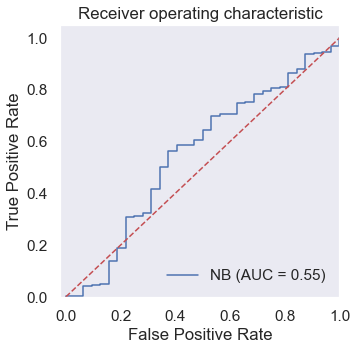

In [428]:
#plotting ROC and AUC
probs = nbModel_grid.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='NB (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

## after applying hyper tuning to the NB model, accuarcy got increased from 87% to 92 %

In [483]:
#let we try fitting new sample in nb grid search

nbModel_grid.fit(X_train_new, y_train_new.ravel())
predictionsnbnew = nbModel_grid.predict(X_test_new)
NBtrainnew=nbModel_grid.score(X_train_new, y_train_new)
NBtestnew= nbModel_grid.score(X_test_new,y_test_new)
print("Train Score",NBtrainnew)
print("Test Score",NBtrainnew)
print("Number of columns: ",len(X_train_new.columns))
print("test precision for fail: ",precision_score(y_test_new,predictionsnbnew, pos_label=0)) #0 is fail
print("test recall for fail: ",recall_score(y_test_new,predictionsnbnew, pos_label=0))
print("test precision for pass: ",precision_score(y_test_new,predictionsnbnew, pos_label=1)) #1 is pass
print("test recall for pass: ",recall_score(y_test_new,predictionsnbnew, pos_label=1))



print('Classfication Report')
print(metrics.classification_report(y_test_new,predictionsnbnew))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test_new,predictionsnbnew))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Train Score 0.9416058394160584
Test Score 0.9416058394160584
Number of columns:  164
test precision for fail:  0.0
test recall for fail:  0.0
test precision for pass:  0.9150743099787686
test recall for pass:  1.0
Classfication Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        40
         1.0       0.92      1.00      0.96       431

    accuracy                           0.92       471
   macro avg       0.46      0.50      0.48       471
weighted avg       0.84      0.92      0.87       471

Confusion Matrix
[[  0  40]
 [  0 431]]


## After training the new population to the model, we got the same accuracy 92%

## XGB models leads Naive bayes model. But their diifernce is not so high.

## Hence, XBG and Navie bayes are more suitable than LR and RF for this dataset

# Model Comparison

In [486]:
modellists = []

modellists.append(['Logistic Regression','80', '73','72','68','66'])

modellists.append(['RF ', RFtrain * 100, RFtest * 100, roc_auc_rf * 100,RFtrainnew * 100, RFtestnew * 100])

modellists.append(['XGB', XGBtrain * 100, XGBtest * 100, roc_auc_xgb * 100,XGBtrainnew*100,XGBtestnew * 100])

modellists.append(['Gaussian Naive Bayes', NBtrain* 100, NBtest * 100, roc_auc_nb * 100,NBtrainnew*100,NBtestnew * 100])

model_df = pd.DataFrame(modellists, columns = ['Model', 'Train Score', 'Test Score','AUC','New Sample Train score','New Sample Test score'])

model_df#.transpose()

,Model,Train Score,Test Score,AUC,New Sample Train score,New Sample Test score
0,Logistic Regression,80,73,72,68,66
1,RF,76.00365,71.974522,83.68451,65.60219,48.407643
2,XGB,100.0,93.205945,83.833998,100.0,91.507431
3,Gaussian Naive Bayes,93.430657,93.205945,55.182232,94.160584,91.507431


## Insights

1. On Comparing all the 4 models  --> XGB doing well, second comes NB
2. AUC for XGB is higher compared to all
3. On fitting the new samples in their trained set, we see XGB score increased.


## Model Selection

1. With the above insights, we selected XGB as best suit model for the semiconductor dataset.


# Future prediciton dataset cleaning

In [548]:
print ('The dataset has {} observations/rows and {} variables/columns.'\
       .format(df2.shape[0], df2.shape[1]))



The dataset has 18 observations/rows and 591 variables/columns.


In [549]:
df2 = df2.drop(columns = ['Time'], axis = 1)

In [550]:
df2.shape

(18, 590)

In [551]:
df2 = df2.fillna(df2.median())

In [562]:
df2.dropna(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,0.0060,82.8602,0.5005,0.0118,0.0035,2.3630,0.0202,0.0151,0.0052,82.0989
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,0.0060,82.8602,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.5816,-0.0270,...,0.0060,82.8602,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5153,0.0157,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5358,0.0111,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5381,0.0159,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [571]:
y = df1['Pass/Fail'][:18]

In [572]:
#Fitting on model

XGmodelprod = XGBClassifier(random_state=1)
%time XGmodelprod.fit(df2, y)


[22:24:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 461 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [573]:
predictionsXGprod = XGmodelprod.predict(df2)


In [575]:
y # Original data 

0    -1
1    -1
2     1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10    1
11    1
12   -1
13   -1
14    1
15   -1
16   -1
17   -1
Name: Pass/Fail, dtype: int64

In [586]:
Result=list(predictionsXGprod) # Production data result
Result

[-1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1]

## On comparing Prod result and Original data, we see similar prediciton on future prediction data.

# Conclusion

## We have seen the XGB model done its best.
## Out of 592 feature, we have seen most import feature comes around 8 to 14, with those feature Engineer can find the pass/fail.